In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score


sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df1 = 'F:/Airline Passenger Satisfaction/train.csv'
df2 ='F:/Airline Passenger Satisfaction/test.csv'
df_train = pd.read_csv(df1)
df_test = pd.read_csv(df2)

In [3]:
df = pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [5]:
df.size

3247000

In [6]:
df.shape

(129880, 25)

In [7]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [9]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [10]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Unnamed: 0,0.0,3246.95,38963.5,97409.05,102604.21,103903.0
id,1.0,6494.95,64940.5,123386.05,128581.21,129880.0
Age,7.0,15.00,40.0,64.00,70.00,85.0
Flight Distance,31.0,176.95,844.0,3380.00,3884.00,4983.0
Inflight wifi service,0.0,1.00,3.0,5.00,5.00,5.0
Departure/Arrival time convenient,0.0,0.00,3.0,5.00,5.00,5.0
Ease of Online booking,0.0,1.00,3.0,5.00,5.00,5.0
Gate location,0.0,1.00,3.0,5.00,5.00,5.0
Food and drink,0.0,1.00,3.0,5.00,5.00,5.0
Online boarding,0.0,1.00,3.0,5.00,5.00,5.0


In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
#df.dropna('', inplace=True)
df.drop('id', axis=1, inplace=True)

In [13]:
df.groupby('satisfaction').mean()


,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,44314.131717,37.653069,929.456333,2.398470,3.130229,2.549512,2.980184,2.958525,2.658846,3.038525,2.892236,3.019570,2.990495,3.374681,3.043045,3.389662,2.932851,16.340184,17.055992
satisfied,43957.035015,41.739824,1529.582454,3.158135,2.962497,3.026554,2.972646,3.525061,4.025648,3.966176,3.964345,3.856475,3.820376,3.966638,3.648786,3.971277,3.746134,12.435001,12.533859


In [14]:
df.groupby('satisfaction').std()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,31219.987359,16.464654,791.267904,0.964160,1.500629,1.208970,1.199839,1.347774,1.146967,1.303985,1.324293,1.283116,1.304357,1.175089,1.282218,1.176544,1.326251,40.048343,40.522021
satisfied,31195.027667,12.795733,1127.724016,1.590674,1.555082,1.578201,1.374162,1.234867,1.195802,1.142553,1.078927,1.128492,1.175978,1.099891,1.158599,1.092410,1.143769,34.865422,35.449502


In [15]:
df.groupby('satisfaction').median()


,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,39319.0,37.0,674.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,0.0,0.0
satisfied,38484.5,43.0,1249.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0


In [16]:
df.std()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\3072461824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


In [17]:
Q1

Unnamed: 0                           16230.0
Age                                     27.0
Flight Distance                        414.0
Inflight wifi service                    2.0
Departure/Arrival time convenient        2.0
Ease of Online booking                   2.0
Gate location                            2.0
Food and drink                           2.0
Online boarding                          2.0
Seat comfort                             2.0
Inflight entertainment                   2.0
On-board service                         2.0
Leg room service                         2.0
Baggage handling                         3.0
Checkin service                          3.0
Inflight service                         3.0
Cleanliness                              2.0
Departure Delay in Minutes               0.0
Arrival Delay in Minutes                 0.0
Name: 0.25, dtype: float64

In [18]:
Q3

Unnamed: 0                           71440.5
Age                                     51.0
Flight Distance                       1744.0
Inflight wifi service                    4.0
Departure/Arrival time convenient        4.0
Ease of Online booking                   4.0
Gate location                            4.0
Food and drink                           4.0
Online boarding                          4.0
Seat comfort                             5.0
Inflight entertainment                   4.0
On-board service                         4.0
Leg room service                         4.0
Baggage handling                         5.0
Checkin service                          4.0
Inflight service                         5.0
Cleanliness                              4.0
Departure Delay in Minutes              12.0
Arrival Delay in Minutes                13.0
Name: 0.75, dtype: float64

In [19]:
df

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [20]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

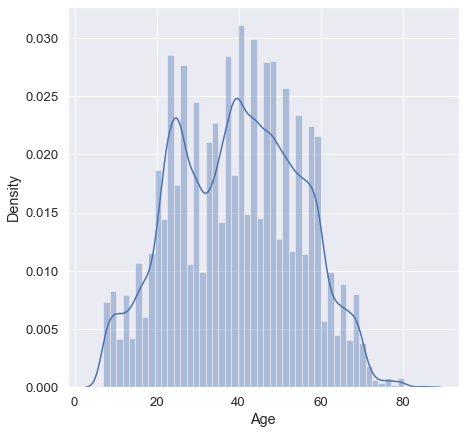

In [21]:
sns.distplot(df['Age'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

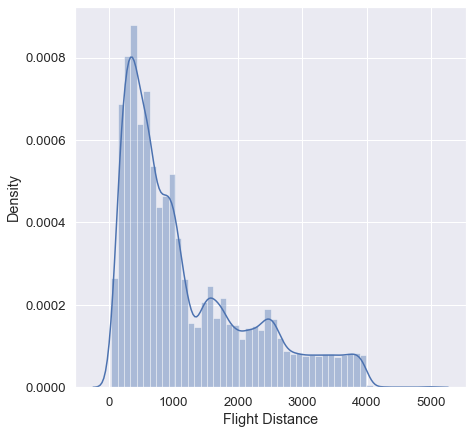

In [22]:
sns.distplot(df['Flight Distance'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inflight wifi service', ylabel='Density'>

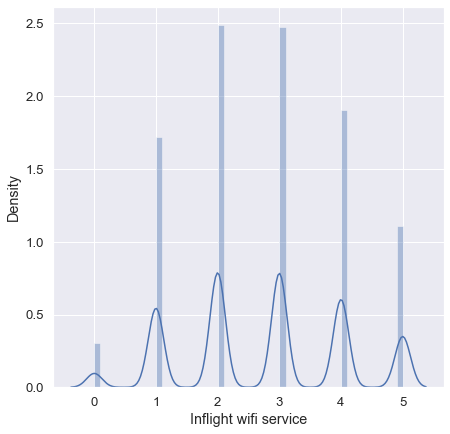

In [23]:
sns.distplot(df['Inflight wifi service'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='Density'>

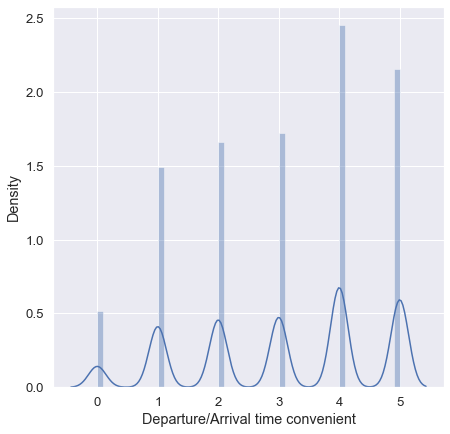

In [24]:
sns.distplot(df['Departure/Arrival time convenient'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ease of Online booking', ylabel='Density'>

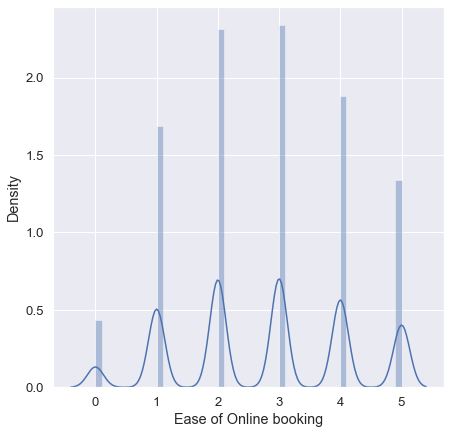

In [25]:
sns.distplot(df['Ease of Online booking'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gate location', ylabel='Density'>

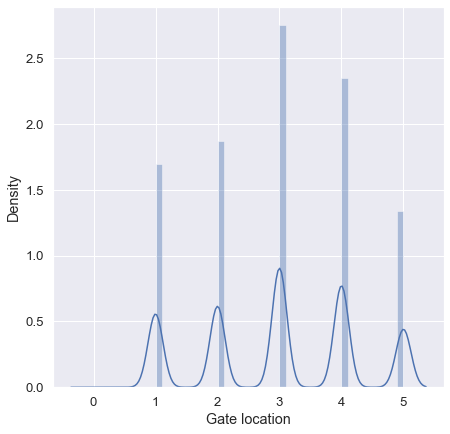

In [26]:
sns.distplot(df['Gate location'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Food and drink', ylabel='Density'>

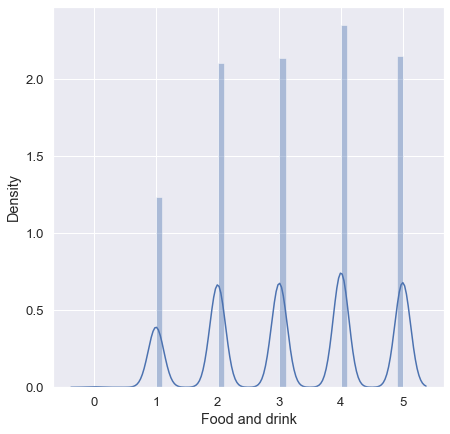

In [27]:
sns.distplot(df['Food and drink'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Online boarding', ylabel='Density'>

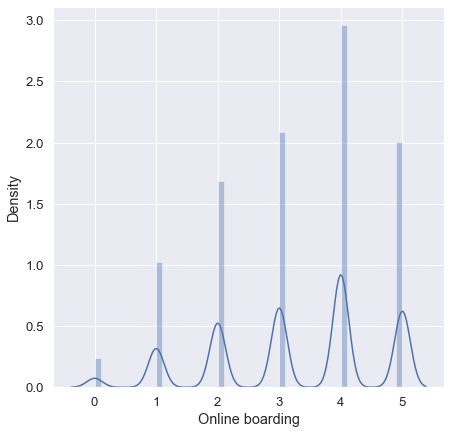

In [28]:
sns.distplot(df['Online boarding'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gate location', ylabel='Density'>

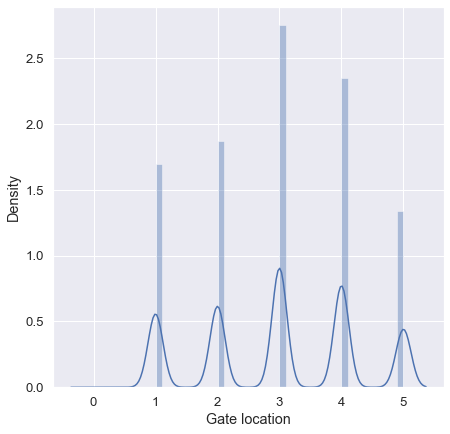

In [29]:
sns.distplot(df['Gate location'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Seat comfort', ylabel='Density'>

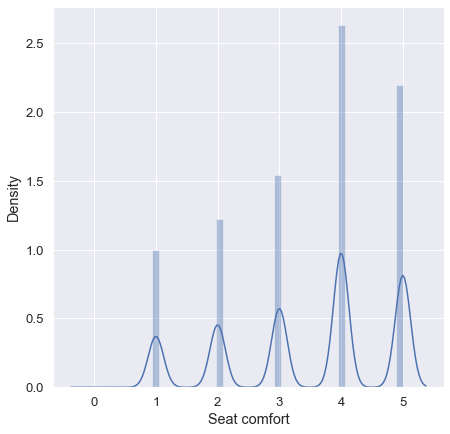

In [30]:
sns.distplot(df['Seat comfort'])

  '', '', '',
       ''

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inflight entertainment', ylabel='Density'>

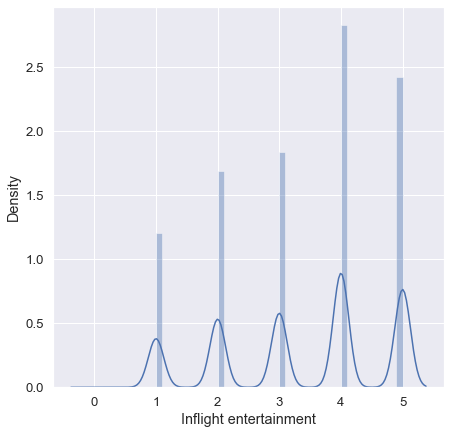

In [31]:
sns.distplot(df['Inflight entertainment'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='On-board service', ylabel='Density'>

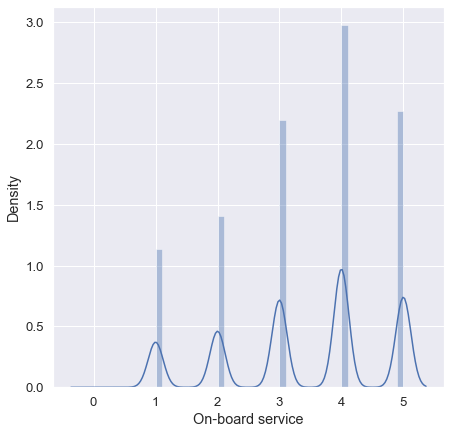

In [32]:
sns.distplot(df['On-board service'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Leg room service', ylabel='Density'>

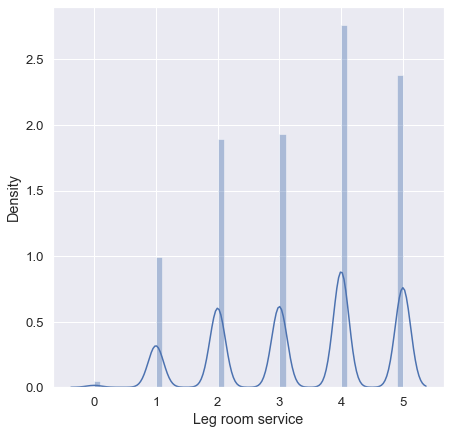

In [33]:
sns.distplot(df['Leg room service'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Baggage handling', ylabel='Density'>

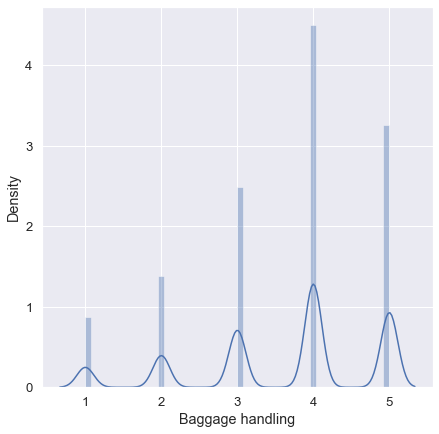

In [34]:
sns.distplot(df['Baggage handling'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Checkin service', ylabel='Density'>

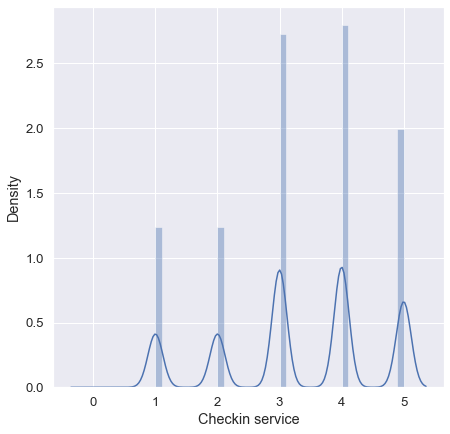

In [35]:
sns.distplot(df['Checkin service'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Leg room service', ylabel='Density'>

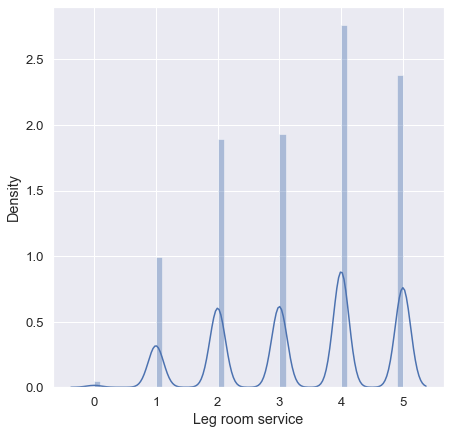

In [36]:
sns.distplot(df['Leg room service'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cleanliness', ylabel='Density'>

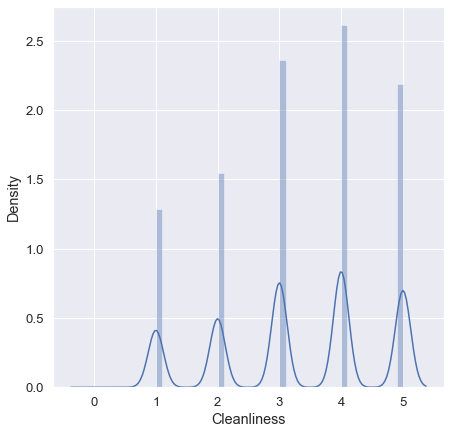

In [37]:
sns.distplot(df['Cleanliness'])

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

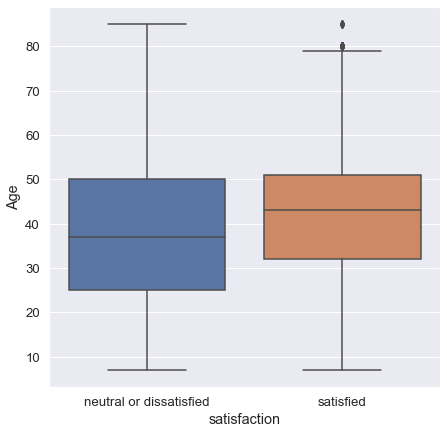

In [38]:
sns.boxplot(x="satisfaction", y="Age", data=df)

<AxesSubplot:xlabel='satisfaction', ylabel='Ease of Online booking'>

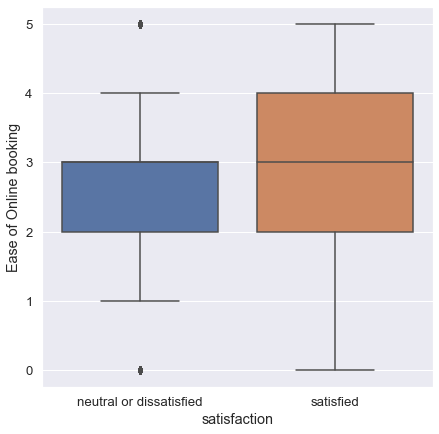

In [39]:
sns.boxplot(x="satisfaction", y="Ease of Online booking", data=df)

<AxesSubplot:xlabel='satisfaction', ylabel='Inflight entertainment'>

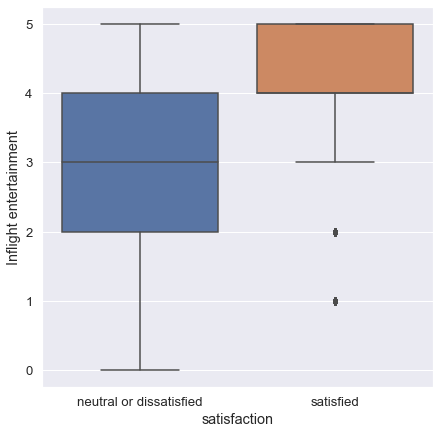

In [40]:
sns.boxplot(x="satisfaction", y="Inflight entertainment", data=df)

<AxesSubplot:xlabel='satisfaction', ylabel='Cleanliness'>

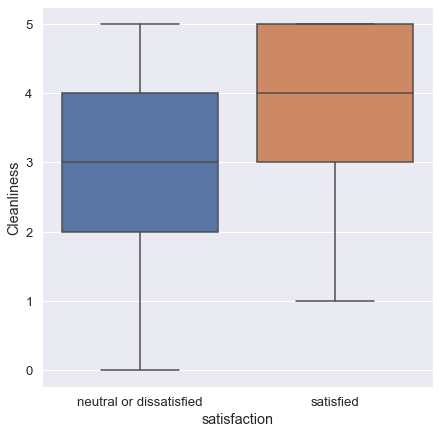

In [41]:
sns.boxplot(x="satisfaction", y="Cleanliness", data=df)

<AxesSubplot:>

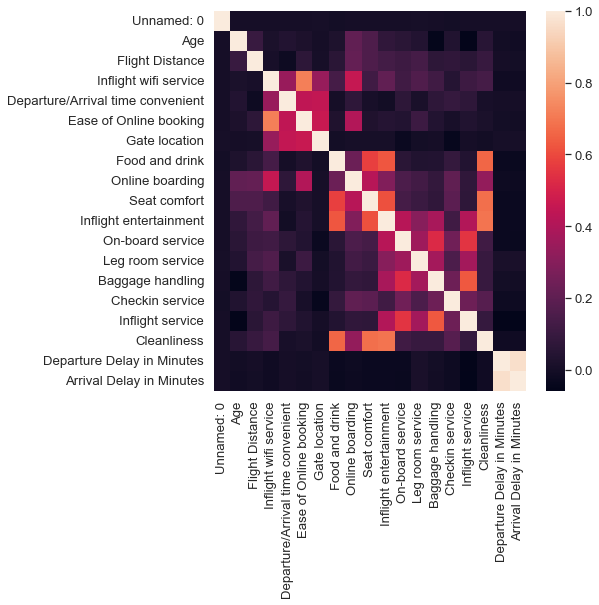

In [42]:
sns.heatmap(df.corr())

In [43]:
df['Gender'].value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

In [44]:
Gender = {'Male':0, 
        'Female':1}

# apply using map
df['Gender'] = df['Gender'].map(Gender)

In [45]:
df['Customer Type'].value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

In [46]:
CustomerType= {'Loyal Customer':0,'disloyal Customer':1}

# apply using map
df['Customer Type'] = df['Customer Type'].map(CustomerType)

In [47]:
df['Type of Travel'].value_counts()

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

In [48]:
TypeofTravel= {'Business travel':0,'Personal Travel':1}

# apply using map
df['Type of Travel'] = df['Type of Travel'].map(TypeofTravel)

In [49]:
df['Class'].value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64

In [50]:
Class= {'Business':0,'Eco':1,'Eco Plus':2}

# apply using map
df['Class'] = df['Class'].map(Class)

In [51]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

In [52]:
satisfaction= {'neutral or dissatisfied':0,'satisfied':1}

# apply using map
df['satisfaction'] = df['satisfaction'].map(satisfaction)

In [53]:
df.corr()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,-0.002592,-0.003112,0.000099,0.002612,-0.000665,0.001253,-0.001206,0.002160,0.001517,...,0.000723,0.000407,0.003170,-0.000402,-0.004640,-0.001759,-0.000850,0.001951,0.002099,-0.005672
Gender,-0.002592,1.000000,0.030803,-0.008984,-0.009215,0.011655,-0.003836,-0.005968,-0.008772,-0.006129,...,-0.003798,-0.006441,-0.031031,-0.036414,-0.008392,-0.038176,-0.002818,-0.003111,-0.001309,-0.011496
Customer Type,-0.003112,0.030803,1.000000,-0.284275,-0.308210,0.042959,-0.226134,-0.005884,-0.206916,-0.018183,...,-0.106157,-0.054040,-0.046885,0.025015,-0.031258,0.023567,-0.081433,0.004131,0.004730,-0.185925
Age,0.000099,-0.008984,-0.284275,1.000000,-0.044910,-0.116967,0.099863,0.015779,0.036780,0.022294,...,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248,0.134001
Type of Travel,0.002612,-0.009215,-0.308210,-0.044910,1.000000,0.486598,-0.267064,-0.105574,0.257208,-0.133891,...,-0.152708,-0.059700,-0.139540,-0.032921,0.016530,-0.023417,-0.084257,-0.006336,-0.005830,-0.449794
Class,-0.000665,0.011655,0.042959,-0.116967,0.486598,1.000000,-0.427144,-0.024912,0.087185,-0.094989,...,-0.183178,-0.210748,-0.198828,-0.166507,-0.157380,-0.159110,-0.129715,0.009553,0.014162,-0.448338
Flight Distance,0.001253,-0.003836,-0.226134,0.099863,-0.267064,-0.427144,1.000000,0.006554,-0.018901,0.064959,...,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935,0.298206
Inflight wifi service,-0.001206,-0.005968,-0.005884,0.015779,-0.105574,-0.024912,0.006554,1.000000,0.344846,0.714888,...,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749,0.283291
Departure/Arrival time convenient,0.002160,-0.008772,-0.206916,0.036780,0.257208,0.087185,-0.018901,0.344846,1.000000,0.437697,...,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942,-0.054457
Ease of Online booking,0.001517,-0.006129,-0.018183,0.022294,-0.133891,-0.094989,0.064959,0.714888,0.437697,1.000000,...,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033,0.168704


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

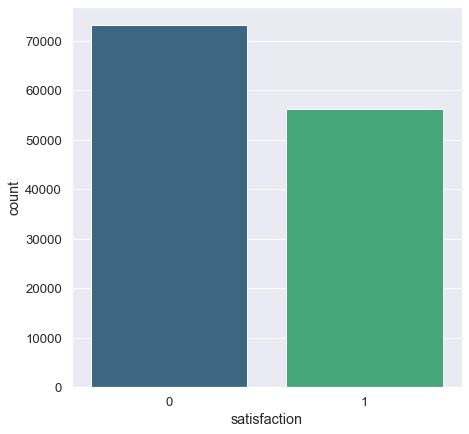

In [54]:
df['satisfaction'].value_counts()

df['satisfaction'].value_counts() * 100 / len(df)


sns.countplot(x='satisfaction', data=df, palette='viridis')

In [55]:
df

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,1,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,1,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,0,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,0,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,0,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,1,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,0,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [56]:
X = df.iloc[:, 0:23].values 
Y = df.iloc[:,23].values

In [57]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,3.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1.0,0.0,1.0,25.0,0.0,0.0,235.0,3.0,2.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,2.0,1.0,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3.0,1.0,0.0,25.0,0.0,0.0,562.0,2.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,4.0,0.0,0.0,61.0,0.0,0.0,214.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


In [58]:
Y = pd.DataFrame(Y)
Y.head()

,0
0,0
1,0
2,1
3,0
4,1


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LOGISTIC REGRESSION

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)
[0]Logistic Regression Training Accuracy: 0.8755369778644451
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14674
           1       0.87      0.83      0.85     11224

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898

Accuracy: 0.8709938991427909
Precision: 0.8656647184339921
Recall: 0.8313435495367071
F1 Score: 0.8481570694905239
Roc Auc Score: 0.8663328078881573
Balanced Accuracy Score: 0.8663328078881573
Confusion Matrix: [[13226  1448]
 [ 1893  9331]]



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


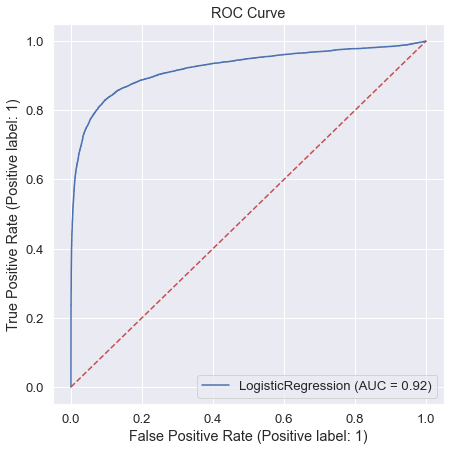

In [61]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
print(log.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, log.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, log.predict(X_test)))
print(F'Precision:', precision_score(Y_test, log.predict(X_test)))
print(F'Recall:', recall_score(Y_test, log.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, log.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, log.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, log.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, log.predict(X_test)) )
print()#Print a new line

# ROC CURVE
plot_roc_curve(log, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# NAIVE BAYES

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()
[0]Logistic Regression Training Accuracy: 0.8642133817297203
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14674
           1       0.86      0.81      0.84     11224

    accuracy                           0.86     25898
   macro avg       0.86      0.86      0.86     25898
weighted avg       0.86      0.86      0.86     25898

Accuracy: 0.8618040003089041
Precision: 0.859494028025957
Recall: 0.8142373485388453
F1 Score: 0.8362538317243905
Roc Auc Score: 0.8562123092701042
Balanced Accuracy Score: 0.8562123092701042
Confusion Matrix: [[13180  1494]
 [ 2085  9139]]



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


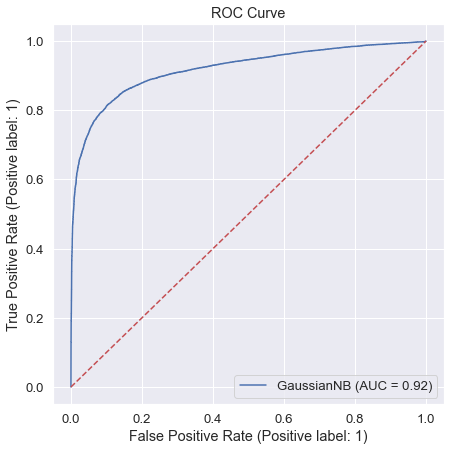

In [62]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
print(gauss.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', gauss.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, gauss.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, gauss.predict(X_test)))
print(F'Precision:', precision_score(Y_test, gauss.predict(X_test)))
print(F'Recall:', recall_score(Y_test, gauss.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, gauss.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, gauss.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, gauss.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, gauss.predict(X_test)) )
print()#Print a new line

# ROC CURVE
plot_roc_curve(gauss, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# DECISION TREE 

DecisionTreeClassifier(criterion='entropy', random_state=0)
[0]Logistic Regression Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14674
           1       0.94      0.94      0.94     11224

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Accuracy: 0.9484902309058615
Precision: 0.9385420361830437
Recall: 0.9428902352102637
F1 Score: 0.940711111111111
Roc Auc Score: 0.9478319242018334
Balanced Accuracy Score: 0.9478319242018335
Confusion Matrix: [[13981   693]
 [  641 10583]]



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


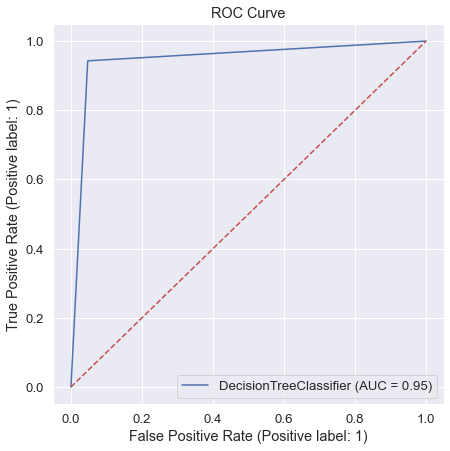

In [63]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
print(tree.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', tree.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, tree.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, tree.predict(X_test)))
print(F'Precision:', precision_score(Y_test, tree.predict(X_test)))
print(F'Recall:', recall_score(Y_test, tree.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, tree.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, tree.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, tree.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, tree.predict(X_test)) )
print()#Print a new line

# ROC CURVE
plot_roc_curve(tree, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# RANDOM FOREST

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\3584376093.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  print(forest.fit(X_train, Y_train))


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)
[0]Logistic Regression Training Accuracy: 0.9970170577957119
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14674
           1       0.97      0.93      0.95     11224

    accuracy                           0.96     25898
   macro avg       0.96      0.95      0.96     25898
weighted avg       0.96      0.96      0.96     25898

Accuracy: 0.9579118078616109
Precision: 0.9746159610340952
Recall: 0.9270313613684961
F1 Score: 0.9502283105022831
Roc Auc Score: 0.9542816613302886
Balanced Accuracy Score: 0.9542816613302887
Confusion Matrix: [[14403   271]
 [  819 10405]]



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


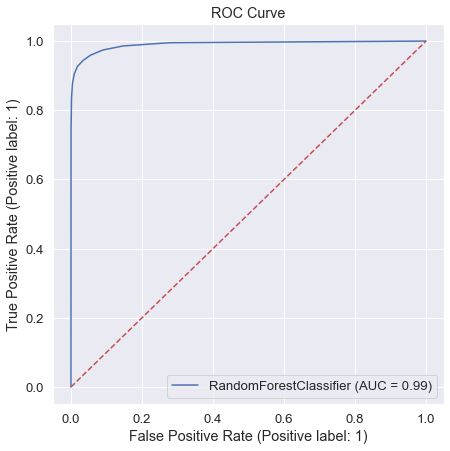

In [64]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
print(forest.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', forest.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, forest.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, forest.predict(X_test)))
print(F'Precision:', precision_score(Y_test, forest.predict(X_test)))
print(F'Recall:', recall_score(Y_test, forest.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, forest.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, forest.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, forest.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, forest.predict(X_test)) )
print()#Print a new line

# ROC CURVE
plot_roc_curve(forest, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [69]:
#Accuracy Score
acc_1 = 0.87 
acc_2 = 0.86
acc_3 = 0.95
acc_4 = 0.96 




results = pd.DataFrame([["Logistic Regression",acc_1],["GaussianNB",acc_2],
                       ["DecisionTreeClassifier",acc_3],["RandomForestClassifie",acc_4]],
                       
                        columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)

results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score
3,RandomForestClassifie,0.960000
2,DecisionTreeClassifier,0.950000
0,Logistic Regression,0.870000
1,GaussianNB,0.860000


# CONCLUSION
Random FOrest Classifier is considered the best model